# Goals 


* Design machine learning that determine the new potential costumer based on Vehicle Class, Education, Marital Status and Employment status

* A machine learning classification model will be developed to identify and predict new potential customers based on demographic and behavioral attributes.

# Import data and Libraries

## Import Libraries

In [1]:
!pip install xgboost


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# data preprocessing
import pandas as pd
import numpy as np

#data visualization
import seaborn as sb
import matplotlib.pyplot as plt
from importlib import reload

#data preparation
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split,KFold
from scipy.stats import kstest
from category_encoders import BinaryEncoder

#modelling
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score
from sklearn.linear_model import Ridge, Lasso, LogisticRegression,LinearRegression
from sklearn.model_selection import cross_val_score,cross_val_predict,GridSearchCV,cross_validate
from sklearn.metrics import root_mean_squared_error 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from xgboost import XGBRegressor

## Import Data

In [3]:
Costumer_dataset = pd.read_csv("data_customer_lifetime_value.csv")
Costumer_dataset.head(10)

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
5,SUV,Basic,Offer2,Employed,Married,Bachelor,8.0,107.0,85.063708,94389.0,8649.700578
6,Four-Door Car,Premium,Offer2,Employed,Married,High School or Below,2.0,101.0,584.567645,25419.0,12052.984090
7,Four-Door Car,Basic,Offer2,Employed,Married,College,1.0,66.0,144.987956,26477.0,2621.116054
8,Four-Door Car,Basic,Offer2,Employed,Married,Bachelor,5.0,65.0,264.563772,36615.0,5243.828046
9,Four-Door Car,Premium,Offer3,Employed,Divorced,College,3.0,117.0,582.781896,59624.0,9156.322563


# EDA

## Numerical Analysis

### Check Info

In [4]:
Costumer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


### Check Describe

melihta anomali data

In [5]:
Costumer_dataset.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


### Check Duplicate

In [6]:
Costumer_dataset.duplicated().sum()

np.int64(618)

In [7]:
Costumer_dataset[Costumer_dataset.duplicated()]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
188,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.200000,0.0,9048.983447
256,Four-Door Car,Basic,Offer1,Retired,Single,Bachelor,1.0,63.0,347.857619,24910.0,2248.449633
331,SUV,Basic,Offer2,Employed,Single,Master,1.0,107.0,513.600000,29462.0,4170.687348
362,SUV,Basic,Offer2,Unemployed,Married,Bachelor,1.0,102.0,660.430456,0.0,3567.503755
366,SUV,Extended,Offer1,Unemployed,Single,College,2.0,126.0,604.800000,0.0,13727.799720
...,...,...,...,...,...,...,...,...,...,...,...
5624,Luxury SUV,Premium,Offer1,Retired,Married,Bachelor,1.0,271.0,1300.800000,14290.0,10179.717040
5640,SUV,Extended,Offer2,Unemployed,Married,College,1.0,122.0,725.870693,0.0,4270.034394
5642,Four-Door Car,Extended,Offer2,Employed,Married,College,1.0,95.0,281.110788,93272.0,3861.486269
5654,Four-Door Car,Extended,Offer2,Employed,Married,College,8.0,82.0,393.600000,72608.0,6521.368813


Because this dataset is used for classification, similar class values are expected and do not represent duplicate data.

### Check NA

In [8]:
Costumer_dataset.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

### Check Null

In [9]:
Costumer_dataset.isnull().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

### Check Normalization

In [10]:
# select number columns
Costumer_dataset_num = Costumer_dataset.select_dtypes(include=["number"])
Costumer_dataset_num

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,2.0,90.0,571.479602,11828.0,10083.486880
1,6.0,62.0,114.514440,44762.0,4943.386117
2,2.0,62.0,257.248789,21514.0,11981.984810
3,1.0,116.0,556.800000,17913.0,4550.856045
4,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...
5664,1.0,74.0,532.800000,0.0,2442.216651
5665,2.0,109.0,523.200000,27778.0,12904.943360
5666,1.0,62.0,44.780402,84658.0,2447.053134
5667,7.0,239.0,1294.700423,22705.0,19160.989940


In [11]:
def normalization(feature):
    _,p_value = kstest(Costumer_dataset_num[feature],"norm")

    if p_value>0.05:
        print(f"data {feature} has normal distribution")
    else:
        print(f"data {feature} doesn't have normal distribution")

In [12]:
for feature in Costumer_dataset_num.columns:
    print(feature)

Number of Policies
Monthly Premium Auto
Total Claim Amount
Income
Customer Lifetime Value


In [13]:
for feature in Costumer_dataset_num.columns:
    normalization(feature=feature)

data Number of Policies doesn't have normal distribution
data Monthly Premium Auto doesn't have normal distribution
data Total Claim Amount doesn't have normal distribution
data Income doesn't have normal distribution
data Customer Lifetime Value doesn't have normal distribution


### Check Outliers

In [14]:
q1 = round(Costumer_dataset_num.quantile(0.25),2)
q2 = round(Costumer_dataset_num.quantile(0.5),2)
q3 = round(Costumer_dataset_num.quantile(0.75),2)
iqr = q3-q1

In [15]:
quartile_dataset = pd.DataFrame({
    "q1":q1,
    "q2":q2,
    "q3":q3,
    "iqr":iqr
})

quartile_dataset

,q1,q2,q3,iqr
Number of Policies,1.00,2.00,4.00,3.00
Monthly Premium Auto,68.00,82.00,109.00,41.00
Total Claim Amount,266.93,379.20,549.99,283.06
Income,0.00,34322.00,62464.00,62464.00
Customer Lifetime Value,3954.34,5800.19,9031.21,5076.87


In [16]:
lowband = q1 - 1.5*iqr
highband = q3 + 1.5*iqr

In [17]:
quartile_dataset["lowband"] = lowband
quartile_dataset["highband"] = highband
quartile_dataset

,q1,q2,q3,iqr,lowband,highband
Number of Policies,1.00,2.00,4.00,3.00,-3.500,8.500
Monthly Premium Auto,68.00,82.00,109.00,41.00,6.500,170.500
Total Claim Amount,266.93,379.20,549.99,283.06,-157.660,974.580
Income,0.00,34322.00,62464.00,62464.00,-93696.000,156160.000
Customer Lifetime Value,3954.34,5800.19,9031.21,5076.87,-3660.965,16646.515


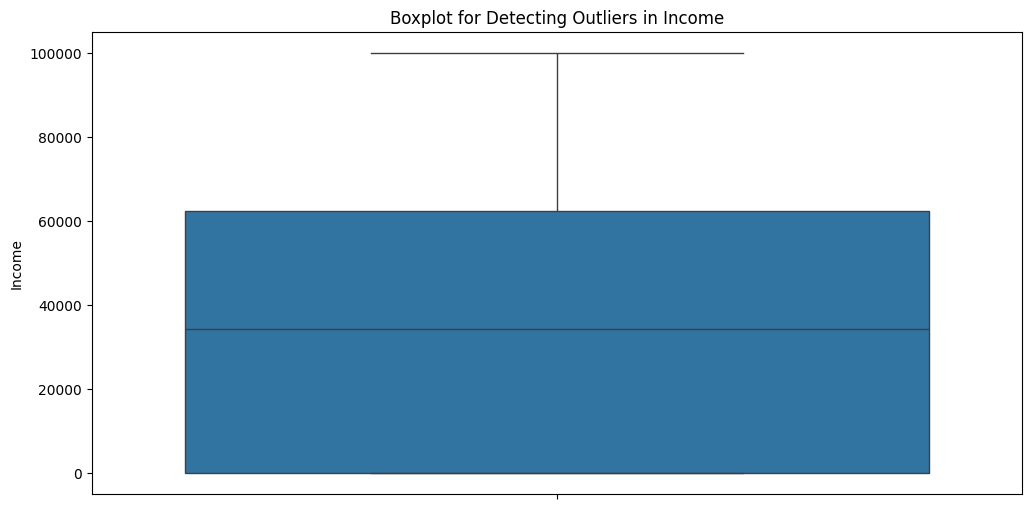

In [18]:
plt.figure(figsize=(12, 6))
sb.boxplot(data=Costumer_dataset_num["Income"])
plt.title("Boxplot for Detecting Outliers in Income")
plt.xticks(rotation=45)
plt.show()

**Observation**
1. No Visible Outliers:
    * The plot shows that all income values fall within the upper and lower band, meaning there are no extreme outliers in this dataset’s income distribution.
2. This suggests that income data is relatively consistent and well-behaved across customers.

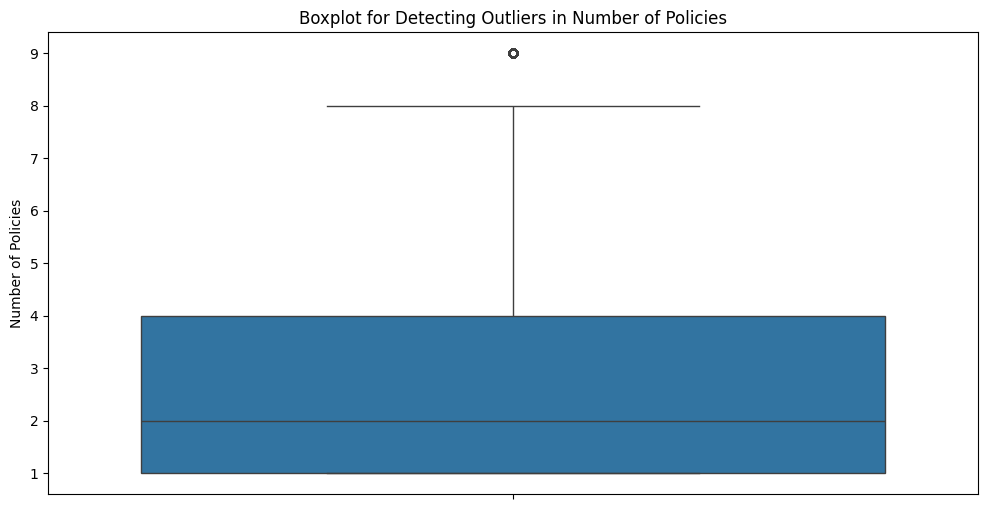

In [19]:
plt.figure(figsize=(12, 6))
sb.boxplot(data=Costumer_dataset_num["Number of Policies"])
plt.title("Boxplot for Detecting Outliers in Number of Policies")
plt.xticks(rotation=45)
plt.show()

In [20]:
Costumer_dataset_num[Costumer_dataset_num["Number of Policies"]>8.5]

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
57,9.0,122.0,650.521790,0.0,9031.214859
108,9.0,84.0,114.815893,22244.0,6686.128629
136,9.0,61.0,40.562432,61613.0,4825.651946
158,9.0,63.0,302.400000,22571.0,4605.036646
159,9.0,70.0,336.000000,59782.0,5626.572446
...,...,...,...,...,...
5617,9.0,83.0,398.400000,0.0,5996.065073
5630,9.0,68.0,326.400000,20862.0,4794.481412
5645,9.0,93.0,498.452698,16224.0,7031.463693
5655,9.0,67.0,132.443705,0.0,4927.707574


**Observation**
1. Most costumers have policies between 1 and 8 .
    * The boxplot shows a few points above 8, meaning the outliers are customers with more than 8 policies.
2. Need further analysis for costumer have more than 8 policies (9 policies)

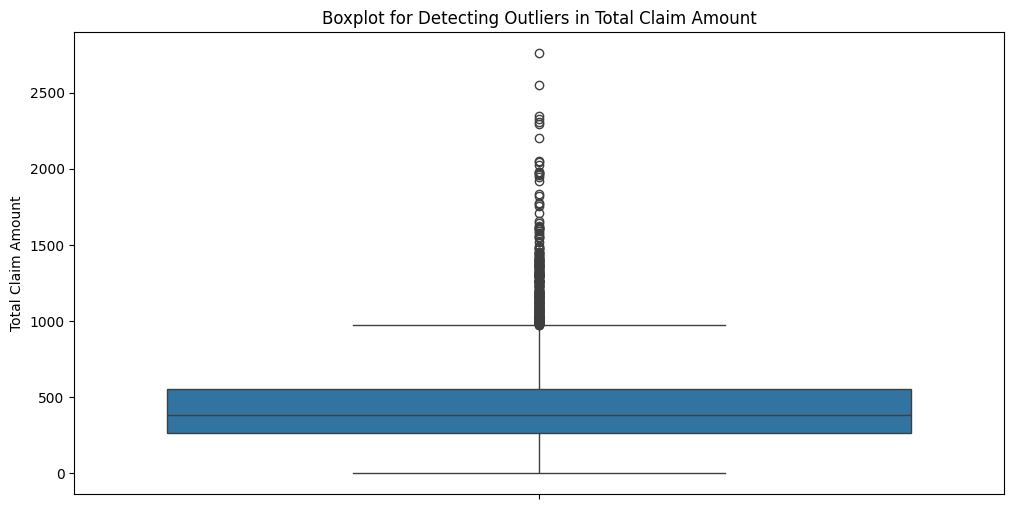

In [21]:
plt.figure(figsize=(12, 6))
sb.boxplot(data=Costumer_dataset_num["Total Claim Amount"])
plt.title("Boxplot for Detecting Outliers in Total Claim Amount")
plt.xticks(rotation=45)
plt.show()

In [22]:
Costumer_dataset_num[Costumer_dataset_num["Total Claim Amount"]>974.85]

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
17,1.0,129.0,1178.950186,0.0,4711.845199
36,1.0,192.0,1921.248929,0.0,6745.248379
56,8.0,191.0,981.010879,38183.0,15277.477960
65,2.0,165.0,1452.213743,0.0,16350.130610
80,3.0,194.0,1067.291208,89464.0,15415.044070
...,...,...,...,...,...
5624,1.0,271.0,1300.800000,14290.0,10179.717040
5626,6.0,117.0,1138.255325,17331.0,8991.984520
5631,3.0,116.0,1193.115879,0.0,8491.465719
5651,1.0,129.0,1486.410662,0.0,4502.867562


**Observation**
1. The boxplot reveals a significant number of outliers above the upper band, indicating that several customers filed exceptionally high total claims compared to the general population. Using the threshold of 974.85, there are 265 outlier records where Total Claim Amount > 974.85.
2. These outliers represent customers who have unusually high claim totals, possibly due to:
    * Frequent claims.
    * Higher insurance coverage tiers (e.g., premium or extended plans).
    * Long customer tenure or multiple policy bundles.
3. Customers with high claim amounts could indicate:
    * High-value clients (profitable but higher-risk). - tolong dijelaskan lebih rinci
    * Potential fraud or excessive claims, requiring further investigation 

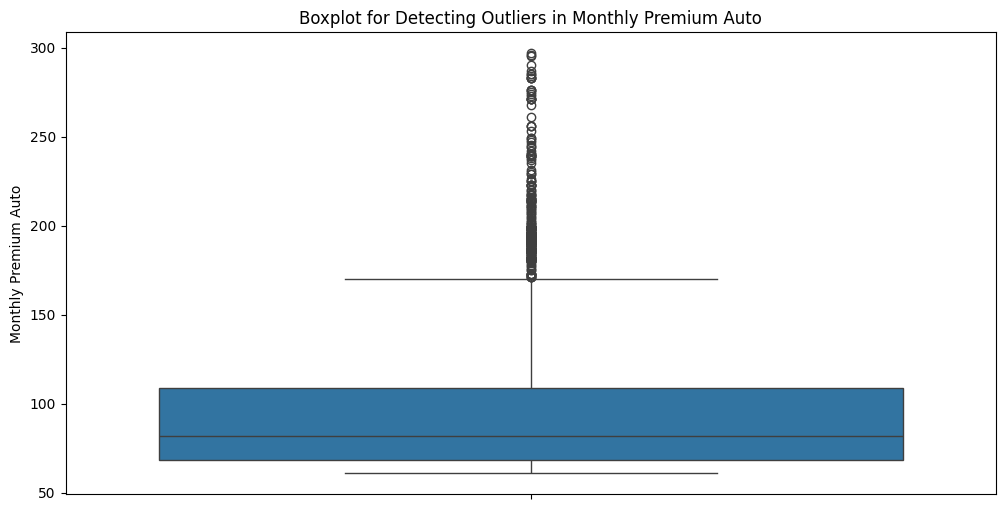

In [23]:
plt.figure(figsize=(12, 6))
sb.boxplot(data=Costumer_dataset_num["Monthly Premium Auto"])
plt.title("Boxplot for Detecting Outliers in Monthly Premium Auto")
plt.xticks(rotation=45)
plt.show()

### Data Analysis

In [24]:
Costumer_dataset

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940


In [25]:
corr_matrix = Costumer_dataset_num.corr()
corr_matrix

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
Number of Policies,1.000000,0.006045,0.005554,-0.007164,0.024721
Monthly Premium Auto,0.006045,1.000000,0.636289,-0.016697,0.402297
Total Claim Amount,0.005554,0.636289,1.000000,-0.353351,0.215354
Income,-0.007164,-0.016697,-0.353351,1.000000,0.025698
Customer Lifetime Value,0.024721,0.402297,0.215354,0.025698,1.000000


<Axes: >

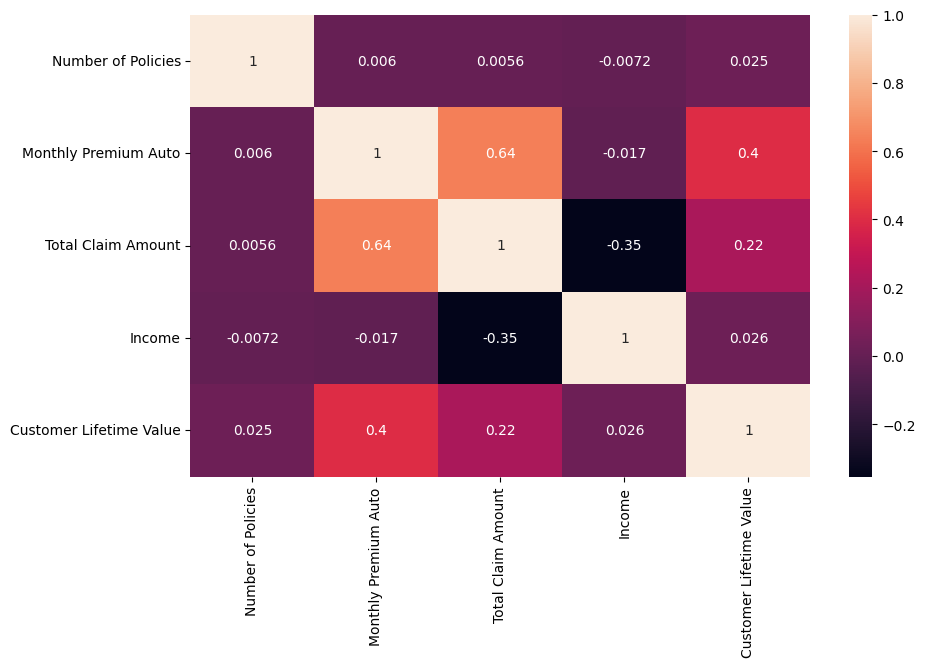

In [26]:
plt.figure(figsize=(10,6))
sb.heatmap(corr_matrix,annot=True)

**Observation**

1. Strongest Relationship:
    * The Total Claim Amount and Monthly Premium Auto show a strong positive correlation (r ≈ 0.64).
        * This indicates that customers who pay higher monthly premiums tend to have higher total claim amounts. It suggests that premium   plans are associated with higher-value claims.

2. Moderate Relationship with CLV:
    * Customer Lifetime Value (CLV) has a moderate positive correlation with:
        * Monthly Premium Auto (r ≈ 0.40) → Customers paying higher monthly premiums often have higher lifetime value.
    * Total Claim Amount (r ≈ 0.22) → Those who claim more tend to have slightly higher CLV.
        * This implies that premium-paying customers are likely long-term and valuable clients.

3. Negative Correlation:
    * Income and Total Claim Amount have a negative correlation (r ≈ -0.35), indicating that customers with higher income tend to claim less.
        * Wealthier individuals may prefer preventive or low-risk coverage, leading to fewer claims.

#### Vehicle class vs CLV

In [27]:
VehicleCLV = Costumer_dataset.groupby(by="Vehicle Class")["Customer Lifetime Value"].sum()
VehicleCLV

Vehicle Class
Four-Door Car    1.898025e+07
Luxury Car       1.795399e+06
Luxury SUV       2.039009e+06
SUV              1.136457e+07
Sports Car       3.414379e+06
Two-Door Car     7.927755e+06
Name: Customer Lifetime Value, dtype: float64

Text(0, 0.5, '$ (x 10.000.000)')

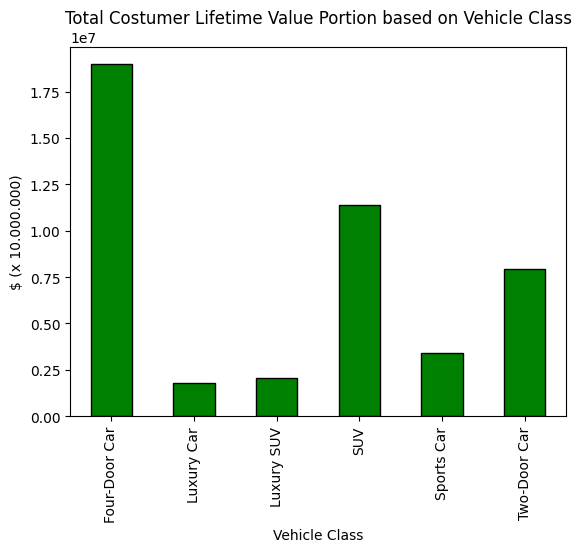

In [28]:
plt.Figure(figsize=(10,6))
VehicleCLV.plot(kind="bar", color="green", edgecolor="black")
plt.title("Total Costumer Lifetime Value Portion based on Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("$ (x 10.000.000)")

**Obeservation** 
* Four-Door Cars contribute the highest total CLV, significantly higher than all other classes.
    * This suggests that customers owning Four-Door Cars are the most valuable to the company — possibly due to higher usage rates, better  retention, or more frequent renewals.
* SUVs rank second, showing a strong CLV contribution, likely due to their popularity and higher premiums compared to smaller vehicles.
* Two-Door Cars and Sports Cars have moderate CLV, suggesting they attract fewer customers or lower spending over time.
* Luxury Cars and Luxury SUVs contribute the least to total CLV despite being premium categories.
     * This could indicate that while they have high individual value, their customer base is small.

**Suggestion**
* Marketing and retention efforts could focus more on Four-Door Car and SUV owners, as they provide the highest overall lifetime value.
* The company might explore growth potential in luxury segments by identifying why CLV is relatively low — e.g., limited engagement or short-term policy renewals.
* Tailored offers (discounts or loyalty rewards) could be designed for mid-range classes like Sports or Two-Door Cars to boost their long-term value.

#### Education vs CLV

In [29]:
Costumer_dataset

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940


In [30]:
educationCLV = Costumer_dataset.groupby(by="Education")["Customer Lifetime Value"].sum()
educationCLV

Education
Bachelor                1.337298e+07
College                 1.284543e+07
Doctor                  1.737216e+06
High School or Below    1.350440e+07
Master                  4.061330e+06
Name: Customer Lifetime Value, dtype: float64

Text(0, 0.5, '')

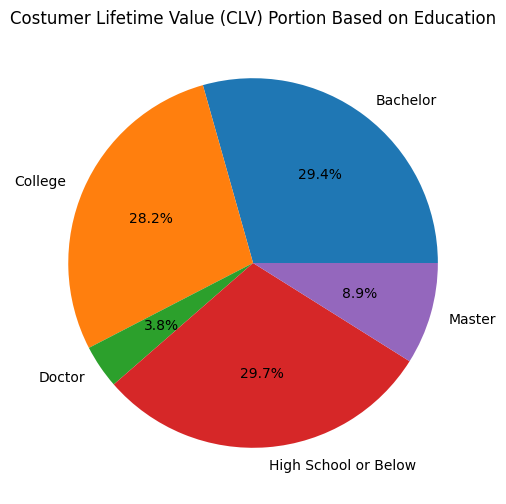

In [31]:
plt.figure(figsize=(10,6))
educationCLV.plot(kind="pie", autopct = "%1.1f%%")
plt.title("Costumer Lifetime Value (CLV) Portion Based on Education")
plt.ylabel("")

**Observation**
* High School or Below (29.7%) and Bachelor degree holders (29.4%) represent the largest contributors to overall CLV.
    * These two segments together account for nearly 60% of total CLV, indicating that mid-education customers are the core of the company’s long-term profitability.
* College graduates (28.2%) also contribute significantly, showing similar value potential to Bachelor-level customers.
    * This suggests that customers in mid-tier education brackets are more engaged and financially consistent.
* Master degree holders (8.9%) and Doctorate holders (3.8%) represent the smallest portions of CLV.
    * These groups might have smaller customer bases or different spending/retention behavior patterns.

**Sugesstion**
* The company’s primary CLV strength lies in customers with mid-level education (High School to Bachelor). Strategies to retain and upsell within this group could maximize lifetime value. To further suggestion, we analyze the education vs marital status
* Meanwhile, targeted engagement campaigns could be developed for higher-education segments (Master/Doctor) to expand their participation and boost profitability.

In [32]:
educationMaritalStat = Costumer_dataset.groupby(by="Education")["Marital Status"].value_counts().reset_index(name="Counts")
educationMaritalStat

,Education,Marital Status,Counts
0,Bachelor,Married,978
1,Bachelor,Single,450
2,Bachelor,Divorced,275
3,College,Married,968
4,College,Single,452
5,College,Divorced,240
6,Doctor,Married,159
7,Doctor,Divorced,39
8,Doctor,Single,28
9,High School or Below,Married,915


**Sugesstion**
* These are the further suggestions:
    1. Family-Centric Campaigns
        * Offer bundle packages designed for families — e.g., “Family Protection Plan” or “Multi-Cover Discount.”
        * Use messaging that appeals to security and savings:
            “Protect your family while saving more — exclusive offers for our loyal family customers.”
        * Create couple or family referral programs where existing married customers get discounts for referrals.

    2. Loyalty and Upgrade Offers
        * These groups may not seek high-end upgrades unless value is clear.
            Offer tier-based loyalty programs that reward consistency:
            * “Stay protected, stay rewarded — every year with us increases your savings.”

    3. Suggest upgrades with added practicality, e.g.,
        * “Upgrade to Extended Coverage for complete family protection — at just 5% more.”

In [33]:
Costumer_dataset

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940


In [34]:
Costumer_dataset.groupby(by="Coverage")["Customer Lifetime Value"].sum()

Coverage
Basic       2.499703e+07
Extended    1.506180e+07
Premium     5.462535e+06
Name: Customer Lifetime Value, dtype: float64

## Categorical Analysis

In [35]:
Costumer_dataset

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940


This function calculates the correlation ratio (η), which measures how strongly a categorical variable explains the variance of a numerical variable.
It works by comparing the mean of each category’s numeric values to the overall mean, then checking how much variation between categories exists relative to the total variation.
The key numbers needed are the categorical values (e.g., Coverage, Education) and the numeric values (e.g., Customer Lifetime Value).
The output η ranges from 0 to 1, where 0 means no relationship and 1 means a perfect relationship.
In essence, it tells how much the numeric variable depends on the grouping of the categorical variable.

ANOVA theory —
it’s not from a specific library, but is widely used in statistics and data science to measure association strength between categorical and continuous variables.

In [36]:
def correlation_ratio(categories, values):
    """
    Calculates the correlation ratio (η) for categorical-numerical association.
    η ∈ [0, 1], where 0 = no relation and 1 = perfect relation.
    """
    categories = np.array(categories)
    values = np.array(values)
    
    # Handle missing values
    mask = ~np.isnan(values)
    categories = categories[mask]
    values = values[mask]
    
    mean_total = np.mean(values)
    categories_unique = np.unique(categories)
    
    numerator = sum([
        len(values[categories == cat]) * 
        (np.mean(values[categories == cat]) - mean_total) ** 2 
        for cat in categories_unique
    ])
    denominator = sum((values - mean_total) ** 2)
    
    if denominator == 0:
        return 0
    return np.sqrt(numerator / denominator)


In [37]:
cat_cols = Costumer_dataset.select_dtypes(include=['object', 'category']).columns
results = []
for col in cat_cols:
    eta = correlation_ratio(Costumer_dataset[col], Costumer_dataset['Customer Lifetime Value'])
    results.append((col, round(eta, 3)))

results

[('Vehicle Class', np.float64(0.362)),
 ('Coverage', np.float64(0.177)),
 ('Renew Offer Type', np.float64(0.101)),
 ('EmploymentStatus', np.float64(0.037)),
 ('Marital Status', np.float64(0.017)),
 ('Education', np.float64(0.05))]

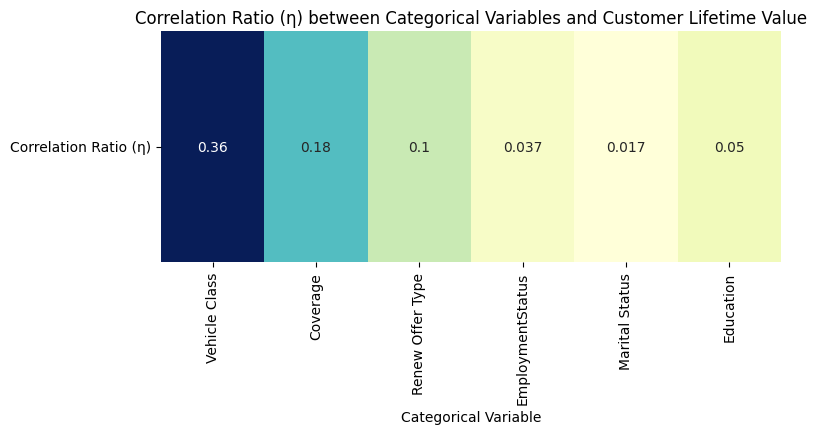

In [38]:
# Create DataFrame
eta_df = pd.DataFrame(results, columns=['Categorical Variable', 'Correlation Ratio (η)'])

# Pivot to suitable heatmap format
eta_df_pivot = eta_df.set_index('Categorical Variable').T

# Plot heatmap
plt.figure(figsize=(8, 3))
sb.heatmap(eta_df_pivot, annot=True, cmap='YlGnBu', cbar=False)
plt.title('Correlation Ratio (η) between Categorical Variables and Customer Lifetime Value', fontsize=12)
plt.yticks(rotation=0)
plt.show()


In [39]:
Costumer_dataset_text = Costumer_dataset.select_dtypes(include=["object"])
Costumer_dataset_text

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below
1,Four-Door Car,Basic,Offer1,Employed,Married,College
2,Two-Door Car,Basic,Offer1,Retired,Married,Master
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below
...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master


### Data Analysis

In [40]:
Costumer_dataset_text.value_counts("Vehicle Class")

Vehicle Class
Four-Door Car    2858
Two-Door Car     1186
SUV              1096
Sports Car        307
Luxury SUV        115
Luxury Car        107
Name: count, dtype: int64

* The majority of customers drive Four-Door Cars (2,858), followed by Two-Door Cars (1,186) and SUVs (1,096).

* High-end segments like Luxury SUVs (115) and Luxury Cars (107) represent only a small portion.
* **Conclusion**: Most customers belong to the mid-range vehicle class, suggesting the company primarily serves everyday users rather than luxury vehicle owners.

In [41]:
Costumer_dataset_text.value_counts("Coverage")

Coverage
Basic       3477
Extended    1704
Premium      488
Name: count, dtype: int64

* Most customers have Basic coverage (3,477), followed by Extended (1,704), and a small number choose Premium (488).
* **Conclusion**: Customers tend to prefer affordable insurance plans, indicating price sensitivity and possibly limited perceived value in premium plans.

In [42]:
Costumer_dataset_text.value_counts("Renew Offer Type")

Renew Offer Type
Offer1    2292
Offer2    1835
Offer3     900
Offer4     642
Name: count, dtype: int64

* The most common offers are Offer1 (2,292) and Offer2 (1,835), while Offer3 (900) and Offer4 (642) are less frequent.
* **Conclusion**: The company’s first two renewal offers are the most effective—these may have better incentives or be more appealing to existing customers. And also check our services whether need to have improvement. because it possible at the first and second offer, the service is good. But in the third offer, they feel the service is not good enough. 

In [43]:
Costumer_dataset_text.value_counts("EmploymentStatus")

EmploymentStatus
Employed         3541
Unemployed       1429
Medical Leave     267
Disabled          252
Retired           180
Name: count, dtype: int64

* The majority of customers are Employed (3,541), followed by Unemployed (1,429).

* A small number are on Medical Leave (267), Disabled (252), or Retired (180).
* **Conclusion**: Most policyholders are active income earners, which likely contributes to higher policy renewals and consistent payments.

In [44]:
Costumer_dataset_text.value_counts("Marital Status")

Marital Status
Married     3305
Single      1514
Divorced     850
Name: count, dtype: int64

* Married customers (3,305) dominate the dataset, followed by Single (1,514) and Divorced (850).
* **Conclusion**: The customer base is largely family-oriented, which could influence higher policy coverage needs for dependents. 

In [45]:
Costumer_dataset_text.value_counts("Education")

Education
Bachelor                1703
College                 1660
High School or Below    1620
Master                   460
Doctor                   226
Name: count, dtype: int64

* The majority of customers hold Bachelor (1,703) and College (1,660) degrees, followed closely by those with a High School or Below education level (1,620). Only a small portion of customers have Master (460) or Doctor (226) degrees.
* **Conclusion**: Most customers have a mid-level education background, suggesting the company’s products appeal primarily to professionals and working-class individuals rather than highly specialized or academic groups. Marketing messages should therefore focus on practical value and clear benefits, rather than complex technical details.

In [46]:
Costumer_dataset

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940


# Data Preconditioning

We want to make Customer Lifetime Value (CLV) that more than average value is a potential costumer

In [47]:
Costumer_dataset

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940


In [48]:
Costumer_dataset["Customer Lifetime Value"].mean()

np.float64(8029.874591946198)

* To simplify the prediction task, the Customer Lifetime Value (CLV) variable is transformed into a binary classification target. Customers with a CLV higher than the dataset’s average (8,029) are labeled as 1, while those below or equal to 8,029 are labeled as 0.

*   To simplify the prediction task, the Customer Lifetime Value (CLV) variable is transformed into a binary classification target. Customers with a CLV higher than the dataset’s average (8,029) are labeled as 1, while those below or equal to 8,029 are labeled as 0.
    * 1 (High-Value Customer):
    Represents customers who contribute above-average revenue and are therefore more valuable to the company. Identifying patterns among these customers helps the business design targeted marketing, retention, and upselling strategies.

    * 0 (Low-Value Customer):
    Represents customers whose lifetime value is below average, which helps the model distinguish between high-potential and low-potential customer profiles.

In [49]:
# dataset for data preprocessing
Costumer_dataset_dataprep = Costumer_dataset.copy()
Costumer_dataset_dataprep

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940


## Encoding

1. Dependend Variable
    * CLV

2. Independend Variable
    * Vehicle Class -> use OneHot Encoding
    * Coverage -> use OneHot Encoding
    * Renew Offer Type -> use Ordinal Encoding


### CLV - Label Encoding

In [50]:
Costumer_dataset_dataprep["CLV_Encod"] = np.where(Costumer_dataset_dataprep["Customer Lifetime Value"]>8029,1,0)
Costumer_dataset_dataprep

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value,CLV_Encod
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880,1
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117,0
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810,1
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045,0
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651,0
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360,1
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134,0
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940,1


In [51]:
Costumer_dataset_dataprep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
 11  CLV_Encod                5669 non-null   int64  
dtypes: float64(5), int64(1), object(6)
memory usage: 531.6+ KB


In [52]:
Costumer_dataset_dataprep.value_counts("CLV_Encod")

CLV_Encod
0    3791
1    1878
Name: count, dtype: int64

In [53]:
CLV_encode = pd.DataFrame(Costumer_dataset_dataprep["CLV_Encod"],dtype=int)
CLV_encode

,CLV_Encod
0,1
1,0
2,1
3,0
4,0
...,...
5664,0
5665,1
5666,0
5667,1


In [54]:
Costumer_dataset_dataprep.value_counts("Education")

Education
Bachelor                1703
College                 1660
High School or Below    1620
Master                   460
Doctor                   226
Name: count, dtype: int64

### Vehicle Class - Onehot Encoding

In [55]:
VC_Encod = pd.get_dummies(
    data=Costumer_dataset_dataprep["Vehicle Class"],
    dtype=int
)

VC_Encod

,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
5664,1,0,0,0,0,0
5665,1,0,0,0,0,0
5666,1,0,0,0,0,0
5667,0,0,1,0,0,0


In [56]:
# Delete 1 column Four-Door Car to prevent multicoliner
VC_Encod.drop(columns=["Four-Door Car"],inplace=True)
VC_Encod

,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,1
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
5664,0,0,0,0,0
5665,0,0,0,0,0
5666,0,0,0,0,0
5667,0,1,0,0,0


### Employment Status - Onehot Encoding

In [57]:
Costumer_dataset_dataprep.value_counts("EmploymentStatus")

EmploymentStatus
Employed         3541
Unemployed       1429
Medical Leave     267
Disabled          252
Retired           180
Name: count, dtype: int64

In [58]:
ES_Encod = pd.get_dummies(
    data=Costumer_dataset_dataprep["EmploymentStatus"],
    dtype=int
)

ES_Encod

,Disabled,Employed,Medical Leave,Retired,Unemployed
0,0,0,0,1,0
1,0,1,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
5664,0,0,0,0,1
5665,0,1,0,0,0
5666,0,1,0,0,0
5667,0,1,0,0,0


### Marital Status - Onehot Encoding

In [59]:
Costumer_dataset_dataprep.value_counts("Marital Status")

Marital Status
Married     3305
Single      1514
Divorced     850
Name: count, dtype: int64

In [60]:
MS_Encod = pd.get_dummies(
    data=Costumer_dataset_dataprep["Marital Status"],
    dtype=int
)

MS_Encod

,Divorced,Married,Single
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
5664,0,0,1
5665,1,0,0
5666,0,0,1
5667,1,0,0


### Education - Ordinal Encoding

In [61]:
Costumer_dataset_dataprep.value_counts("Education")

Education
Bachelor                1703
College                 1660
High School or Below    1620
Master                   460
Doctor                   226
Name: count, dtype: int64

In [62]:
encoder = OrdinalEncoder(categories=[["High School or Below","College","Bachelor","Master","Doctor"]])
ED_Encod = pd.DataFrame(encoder.fit_transform(Costumer_dataset_dataprep[["Education"]]),columns=["ED_Encod"])
ED_Encod

,ED_Encod
0,0.0
1,1.0
2,3.0
3,0.0
4,0.0
...,...
5664,0.0
5665,2.0
5666,2.0
5667,3.0


### Coverage - Onehot Encoding

In [63]:
CG_Encod = pd.get_dummies(
    data=Costumer_dataset_dataprep["Coverage"],
    dtype=int
)

CG_Encod

,Basic,Extended,Premium
0,0,1,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
5664,1,0,0
5665,0,0,1
5666,1,0,0
5667,0,1,0


In [64]:
# Delete 1 column to prevent multicoliner
CG_Encod.drop(columns=["Basic"],inplace=True)
CG_Encod

,Extended,Premium
0,1,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
5664,0,0
5665,0,1
5666,0,0
5667,1,0


### Renew Offer Type - Ordinal Encoding

In [65]:
Costumer_dataset_dataprep.groupby("Renew Offer Type")["Customer Lifetime Value"].sum()

Renew Offer Type
Offer1    2.029806e+07
Offer2    1.347317e+07
Offer3    7.043141e+06
Offer4    4.706985e+06
Name: Customer Lifetime Value, dtype: float64

In [66]:
encoder_RO = OrdinalEncoder(categories=[["Offer1","Offer2","Offer3","Offer4"]])
RO_Encod = pd.DataFrame(encoder_RO.fit_transform(Costumer_dataset_dataprep[["Renew Offer Type"]]),columns=["RO_Encod"])
RO_Encod

,RO_Encod
0,0.0
1,0.0
2,0.0
3,2.0
4,2.0
...,...
5664,3.0
5665,0.0
5666,0.0
5667,1.0


In [67]:
Costumer_dataset_encode = pd.concat([VC_Encod,CG_Encod,RO_Encod],axis=1)
Costumer_dataset_encode

,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Extended,Premium,RO_Encod
0,0,0,0,0,0,1,0,0.0
1,0,0,0,0,0,0,0,0.0
2,0,0,0,0,1,0,0,0.0
3,0,0,0,0,0,0,1,2.0
4,0,0,0,0,1,0,0,2.0
...,...,...,...,...,...,...,...,...
5664,0,0,0,0,0,0,0,3.0
5665,0,0,0,0,0,0,1,0.0
5666,0,0,0,0,0,0,0,0.0
5667,0,1,0,0,0,1,0,1.0


## Scaller

* Because the features Total Claim Amount and Monthly Premium Auto contain many outliers, we applied RobustScaler. This method minimizes the influence of extreme values and produces a more reliable representation for model training.

### Total Claim Amount - Robust Scaller

In [68]:
# Initialize the scaler
scaler = RobustScaler()

# Apply scaling only to 'Total Claim Amount'
TCA_scaled = scaler.fit_transform(
    Costumer_dataset[['Total Claim Amount']]
)

# Create a new DataFrame
TCA_Scale_df = pd.DataFrame(TCA_scaled, columns=['TCA_scaler'])

# Check the result
TCA_Scale_df


,TCA_scaler
0,0.679305
1,-0.935108
2,-0.430841
3,0.627443
4,-0.082596
...,...
5664,0.542653
5665,0.508738
5666,-1.181471
5667,3.234371


In [69]:
Costumer_dataset["Total Claim Amount"]

0        571.479602
1        114.514440
2        257.248789
3        556.800000
4        355.820799
           ...     
5664     532.800000
5665     523.200000
5666      44.780402
5667    1294.700423
5668     161.615740
Name: Total Claim Amount, Length: 5669, dtype: float64

### Monthly Premi Auto - Robust Scaller

In [70]:
# Apply scaling only to 'Monthly Premium Auto'
MPA_scaled = scaler.fit_transform(
    Costumer_dataset[['Monthly Premium Auto']]
)

# Create a new DataFrame
MPA_Scale_df = pd.DataFrame(MPA_scaled, columns=['MPA_scaler'])

# Check the result
MPA_Scale_df

,MPA_scaler
0,0.195122
1,-0.487805
2,-0.487805
3,0.829268
4,-0.487805
...,...
5664,-0.195122
5665,0.658537
5666,-0.487805
5667,3.829268


In [71]:
Costumer_dataset["Monthly Premium Auto"]

0        90.0
1        62.0
2        62.0
3       116.0
4        62.0
        ...  
5664     74.0
5665    109.0
5666     62.0
5667    239.0
5668    199.0
Name: Monthly Premium Auto, Length: 5669, dtype: float64

## Data Frame for Modeling

In [72]:
Modeling_Dataset = pd.concat([VC_Encod,CG_Encod,RO_Encod,TCA_Scale_df,MPA_Scale_df,Costumer_dataset_dataprep["Customer Lifetime Value"]],axis=1)
Modeling_Dataset

,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Extended,Premium,RO_Encod,TCA_scaler,MPA_scaler,Customer Lifetime Value
0,0,0,0,0,0,1,0,0.0,0.679305,0.195122,10083.486880
1,0,0,0,0,0,0,0,0.0,-0.935108,-0.487805,4943.386117
2,0,0,0,0,1,0,0,0.0,-0.430841,-0.487805,11981.984810
3,0,0,0,0,0,0,1,2.0,0.627443,0.829268,4550.856045
4,0,0,0,0,1,0,0,2.0,-0.082596,-0.487805,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,0,0,0,0,0,0,0,3.0,0.542653,-0.195122,2442.216651
5665,0,0,0,0,0,0,1,0.0,0.508738,0.658537,12904.943360
5666,0,0,0,0,0,0,0,0.0,-1.181471,-0.487805,2447.053134
5667,0,1,0,0,0,1,0,1.0,3.234371,3.829268,19160.989940


## Devide Data Test and Train

In [73]:
x = Modeling_Dataset.drop(columns="Customer Lifetime Value")
x

,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Extended,Premium,RO_Encod,TCA_scaler,MPA_scaler
0,0,0,0,0,0,1,0,0.0,0.679305,0.195122
1,0,0,0,0,0,0,0,0.0,-0.935108,-0.487805
2,0,0,0,0,1,0,0,0.0,-0.430841,-0.487805
3,0,0,0,0,0,0,1,2.0,0.627443,0.829268
4,0,0,0,0,1,0,0,2.0,-0.082596,-0.487805
...,...,...,...,...,...,...,...,...,...,...
5664,0,0,0,0,0,0,0,3.0,0.542653,-0.195122
5665,0,0,0,0,0,0,1,0.0,0.508738,0.658537
5666,0,0,0,0,0,0,0,0.0,-1.181471,-0.487805
5667,0,1,0,0,0,1,0,1.0,3.234371,3.829268


In [74]:
y = Modeling_Dataset["Customer Lifetime Value"]
y

0       10083.486880
1        4943.386117
2       11981.984810
3        4550.856045
4        2372.155492
            ...     
5664     2442.216651
5665    12904.943360
5666     2447.053134
5667    19160.989940
5668     7664.219255
Name: Customer Lifetime Value, Length: 5669, dtype: float64

In [75]:
# Divide train data and test
x_train,x_test,y_train,y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
)

In [76]:
x_train

,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Extended,Premium,RO_Encod,TCA_scaler,MPA_scaler
1071,0,0,0,0,0,1,0,0.0,0.873333,0.121951
718,0,0,0,0,1,0,0,1.0,-0.186537,-0.341463
4387,0,0,0,0,0,1,0,1.0,0.050874,0.000000
670,0,0,0,0,0,1,0,1.0,0.364906,-0.097561
4586,0,0,0,0,0,0,0,2.0,-0.879327,-0.268293
...,...,...,...,...,...,...,...,...,...,...
3772,0,0,1,0,0,1,0,3.0,0.847896,1.146341
5191,0,0,0,0,0,1,0,1.0,-1.164970,0.170732
5226,0,0,0,0,0,0,0,1.0,-0.336331,-0.365854
5390,0,0,1,0,0,0,1,0.0,0.031613,1.780488


In [77]:
x_test

,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Extended,Premium,RO_Encod,TCA_scaler,MPA_scaler
3528,0,0,0,0,0,0,1,0.0,-0.491156,0.536585
5359,0,0,0,0,0,1,0,1.0,-0.435254,-0.048780
1858,0,0,0,0,0,1,0,0.0,-0.033916,-0.121951
2523,0,0,0,0,0,0,1,1.0,0.356376,0.512195
4412,0,0,1,0,0,1,0,1.0,0.763106,1.024390
...,...,...,...,...,...,...,...,...,...,...
43,0,0,1,0,0,0,0,0.0,1.081164,0.512195
5229,0,0,1,0,0,0,0,0.0,-1.057518,0.682927
3815,0,0,1,0,0,1,0,0.0,0.712233,0.951220
1297,0,0,0,1,0,1,0,1.0,0.797022,1.073171


In [78]:
y_train

1071     9806.215757
718     16510.967220
4387     6521.368813
670      6091.899230
4586     5614.587986
            ...     
3772     5160.251878
5191    10484.915350
5226     8044.872393
5390    12282.840850
860      7942.174213
Name: Customer Lifetime Value, Length: 4535, dtype: float64

In [79]:
y_test

3528    12174.589580
5359     3184.355246
1858     2993.117683
2523     4111.888285
4412     8401.788653
            ...     
43       3771.617797
5229     8737.837514
3815     4756.913057
1297    14866.451160
4963    20940.303060
Name: Customer Lifetime Value, Length: 1134, dtype: float64

In [80]:
modeling_data = Modeling_Dataset.to_csv("Modeling_Dataset.csv",index=False)

# Modelling

Since our dataset is mixed categorical (one-hot, ordinal) and binary with a binary target (0 or 1), we’re dealing with a classification problem predicting whether a customer is high value (1) or low value (0).

* Here we try 3 machine learning models 
    1. Single Model:
        * KNN Regressor and Decision Tree Regressor.
    2. Assamble Model:
        * Random Forest and XG Boost
    3. Linear Model:
        * Linear Regressor and Ridge

## Single Model

### KNN Regressor

In [81]:
knn = KNeighborsRegressor()
cv = KFold(n_splits=5,shuffle=True,random_state=42)

In [82]:
neig_num = np.arange(1,100,5)
param_grid = {
    "n_neighbors":neig_num
}

In [83]:
# KNN model + CV search
grid = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",  # optimize MAE;
    cv=cv,
    n_jobs=-1
)

grid.fit(X=x_train, y=y_train)

print("Best params:", grid.best_params_)
print(f"CV best MAE: {-grid.best_score_:.3f}")

Best params: {'n_neighbors': np.int64(96)}
CV best MAE: 3901.046


In [84]:
# Evaluate best model on the held-out test set
best_knn = grid.best_estimator_
y_pred = best_knn.predict(x_test)

mae  = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("\nTest set performance:")
print(f"MAE : {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²  : {r2:.3f}")


Test set performance:
MAE : 3832.533
RMSE: 36471444.547
R²  : 0.177


* Observation
    * The best number of neighbors (k) chosen by GridSearchCV was 96.
    * This means that the model achieved its lowest mean absolute error (MAE) when it averaged predictions from the 96 nearest neighbors in the feature space.
    * The CV MAE = 3901.046 indicates that on average, during 5-fold cross-validation, the model’s prediction was off by about 3,901 units of Customer Lifetime Value.
    * MAE = 3832.53 → Average error on the test set is around 3,833 units — consistent with CV, which is good (no major overfitting).
    * RMSE = 36,471,444.55 → This value looks very large compared to MAE. It indicates that there are a few extreme outliers (large squared errors), since RMSE penalizes large deviations more than MAE.
    * R² = 0.177 → The model only explains about 17.7% of the variance in Customer Lifetime Value.
    This means the KNN regressor fits only weakly — many other factors still unexplained.

* Interpretation:
    * Since KNN predictions are based on nearby data points, a large k (96) smooths predictions heavily — it reduces variance but can increase bias.
    * This usually happens when:
        * The dataset is noisy or high-dimensional.
        * Smaller k values gave unstable or overfitted results.


### Decission Tree Regressor

In [85]:
DecTree_Model = DecisionTreeRegressor(random_state=42)

In [86]:
param_grid = {"max_depth":np.arange(1,20)}
param_grid


{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19])}

In [87]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(
    estimator=DecTree_Model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # optimize MAE
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid.fit(x_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'max_depth': array([ 1, 2... 18, 19])}"
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [88]:
best_decTree = grid.best_estimator_

print("=== Cross Validation Result ===")
print(f"Best max_depth : {grid.best_params_['max_depth']}")
print(f"CV best MAE    : {-grid.best_score_:.3f}")

=== Cross Validation Result ===
Best max_depth : 3
CV best MAE    : 3951.018


In [89]:
y_pred = best_decTree.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100  # interpret R² as % fit

print("\n=== Test Set Performance ===")
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.3f}")
print(f"Approx. Accuracy : {accuracy:.2f}%")


=== Test Set Performance ===
MAE  : 3846.231
RMSE : 36386089.301
R²   : 0.178
Approx. Accuracy : 17.85%


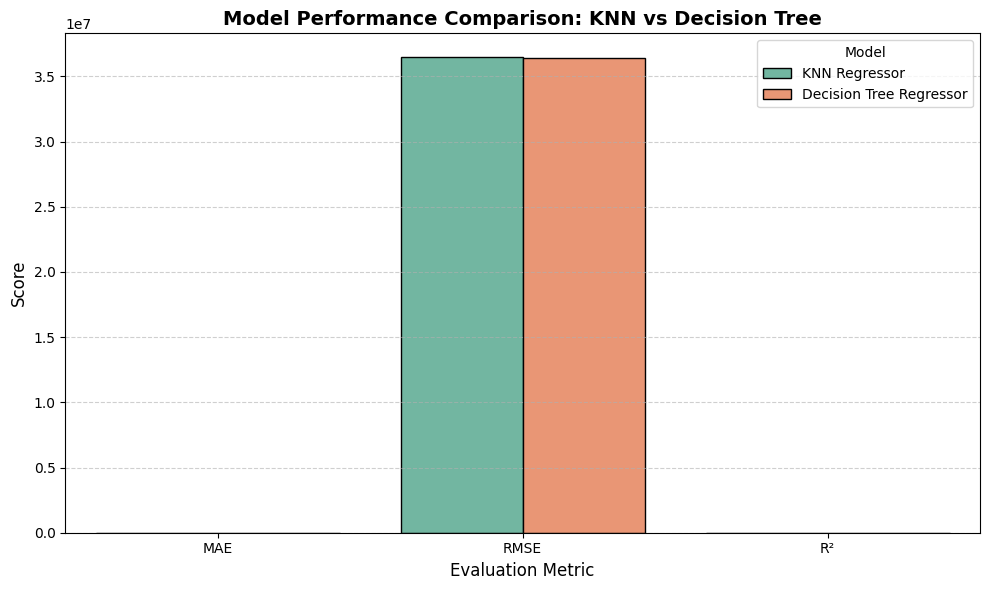

In [90]:
results = {
    'Model': ['KNN Regressor', 'Decision Tree Regressor'],
    'MAE': [3832.533, 3846.231],        # replace mae with your DT test result
    'RMSE': [36471444.547, 36386089],  # replace rmse with your DT test result
    'R²': [0.177, 0.178]              # replace r2 with your DT test result
}

df_results = pd.DataFrame(results)

# === Melt DataFrame for better visualization ===
df_melt = df_results.melt(id_vars='Model', var_name='Metric', value_name='Score')

# === Plot grouped bar chart ===
plt.figure(figsize=(10, 6))
sb.barplot(data=df_melt, x='Metric', y='Score', hue='Model', palette='Set2', edgecolor='black')

plt.title('Model Performance Comparison: KNN vs Decision Tree', fontsize=14, weight='bold')
plt.xlabel('Evaluation Metric', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend(title='Model', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Model Assemble

### Random Forest

In [91]:
rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

In [92]:
param_grid = {'n_estimators': [100, 200, 300, 400, 500]}

In [93]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # optimize MAE
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'n_estimators': [100, 200, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [94]:
results_df = pd.DataFrame(grid.cv_results_)[['param_n_estimators', 'mean_test_score', 'std_test_score']]
results_df.rename(columns={'param_n_estimators': 'n_estimators',
                           'mean_test_score': 'Mean R²',
                           'std_test_score': 'Std R²'}, inplace=True)

print("=== Cross Validation Results (per n_estimators) ===")
print(results_df)

=== Cross Validation Results (per n_estimators) ===
   n_estimators      Mean R²      Std R²
0           100 -4164.617521  121.772269
1           200 -4163.596236  113.980756
2           300 -4169.977179  112.459817
3           400 -4163.856434  115.326460
4           500 -4165.636996  115.789337


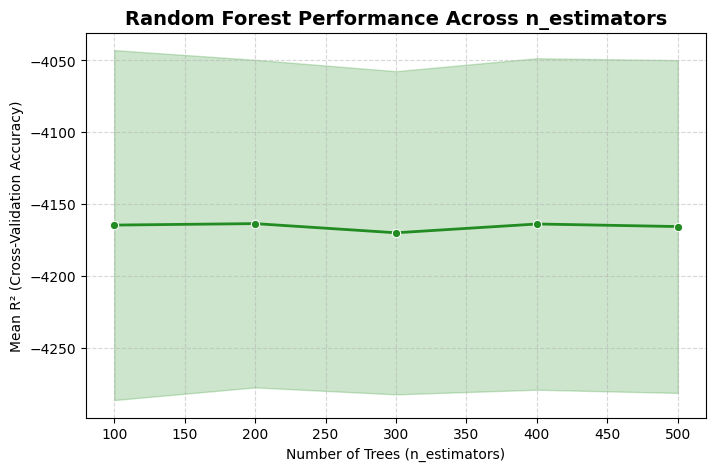

In [95]:
plt.figure(figsize=(8, 5))
sb.lineplot(data=results_df, x='n_estimators', y='Mean R²', marker='o', linewidth=2, color='forestgreen')
plt.fill_between(results_df['n_estimators'],
                 results_df['Mean R²'] - results_df['Std R²'],
                 results_df['Mean R²'] + results_df['Std R²'],
                 alpha=0.2, color='green')
plt.title('Random Forest Performance Across n_estimators', fontsize=14, weight='bold')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean R² (Cross-Validation Accuracy)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [96]:
best_rf = grid.best_estimator_

print("=== Cross Validation Result ===")
print(f"Best n_estimators : {grid.best_params_['n_estimators']}")
print(f"CV best MAE       : {-grid.best_score_:.3f}")

=== Cross Validation Result ===
Best n_estimators : 200
CV best MAE       : 4163.596


In [97]:
y_pred = best_rf.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

print("\n=== Test Set Performance ===")
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.3f}")
print(f"Approx. Accuracy : {accuracy:.2f}%")


=== Test Set Performance ===
MAE  : 3971.242
RMSE : 38506212.250
R²   : 0.131
Approx. Accuracy : 13.06%


The accuracy (R²) increases up to around 300–400 estimators, then stabilizes — meaning that adding more trees doesn’t significantly improve model performance but increases computation time.

### XG Boost

In [98]:
xgb = XGBRegressor(
    max_depth=3,
    random_state=42,
)

In [99]:
param_grid = {'n_estimators': [0, 10, 30, 50, 70, 90,110]}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [100]:
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',           # use R² as "accuracy"
    cv=cv,
)

grid.fit(x_train, y_train)

,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'n_estimators': [0, 10, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [101]:
results_df = pd.DataFrame(grid.cv_results_)[['param_n_estimators', 'mean_test_score', 'std_test_score']]
results_df.rename(columns={
    'param_n_estimators': 'n_estimators',
    'mean_test_score': 'Mean R²',
    'std_test_score': 'Std R²'
}, inplace=True)

print("=== Cross Validation Accuracy per n_estimators ===")
print(results_df)

=== Cross Validation Accuracy per n_estimators ===
   n_estimators   Mean R²    Std R²
0             0 -1.334515  0.069559
1            10  0.141346  0.032175
2            30  0.128985  0.030545
3            50  0.116530  0.030944
4            70  0.112038  0.042477
5            90  0.107008  0.047719
6           110  0.101823  0.045501


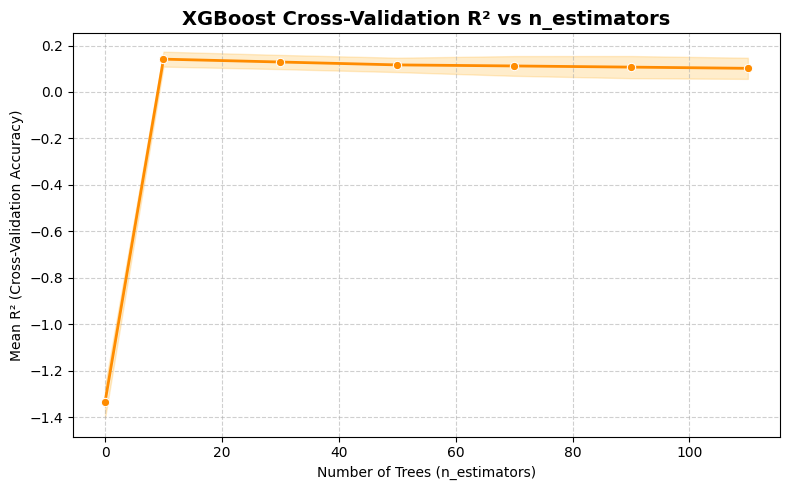

In [102]:
plt.figure(figsize=(8,5))
sb.lineplot(data=results_df, x='n_estimators', y='Mean R²', marker='o', color='darkorange', linewidth=2)
plt.fill_between(results_df['n_estimators'],
                 results_df['Mean R²'] - results_df['Std R²'],
                 results_df['Mean R²'] + results_df['Std R²'],
                 color='orange', alpha=0.2)
plt.title('XGBoost Cross-Validation R² vs n_estimators', fontsize=14, weight='bold')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean R² (Cross-Validation Accuracy)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

* When n_estimators is very low, the model performs poorly (negative R²), meaning it hasn’t learned enough from the data yet.
* Around 10–20 trees, the R² reaches its highest value (~0.1–0.15) — this is the sweet spot where the model best captures the relationship between features and target.
* After 20 trees, R² gradually decreases, indicating overfitting — adding more trees reduces generalization and slightly worsens performance.

## Linear Model

### Linear Regression


In [103]:
lr = LinearRegression()

In [104]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'MAE': 'neg_mean_absolute_error',
    'RMSE': 'neg_root_mean_squared_error',
    'R2': 'r2'
}

cv_results = cross_validate(lr, x_train, y_train, cv=cv, scoring=scoring)

print("=== Cross Validation (Training Set) ===")
print(f"CV MAE  : {(-cv_results['test_MAE']).mean():.3f}")
print(f"CV RMSE : {(-cv_results['test_RMSE']).mean():.3f}")
print(f"CV R²   : {(cv_results['test_R2']).mean():.3f}")

=== Cross Validation (Training Set) ===
CV MAE  : 3925.169
CV RMSE : 6403.041
CV R²   : 0.156


In [105]:
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

print("\n=== Test Set Performance ===")
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.3f}")
print(f"Approx. Accuracy : {accuracy:.2f}%")


=== Test Set Performance ===
MAE  : 3855.003
RMSE : 36651587.487
R²   : 0.172
Approx. Accuracy : 17.25%


* The model achieved an R² of 0.17 (≈17%), meaning it explains only about 17% of the variance in Customer Lifetime Value. This indicates a weak linear relationship, suggesting the data likely contains nonlinear patterns that Linear Regression can’t fully capture.
* With MAE ≈ 3,855 and RMSE ≈ 6,665, the model’s average prediction error is relatively high — showing that actual CLV values often differ significantly from predicted ones.
* Despite its limited accuracy, the Linear Regression serves as a good baseline model for comparison. More complex models (like Random Forest or XGBoost) are expected to perform better because they can model nonlinear interactions between features.

### Ridge Regression

In [106]:
ridge = Ridge(random_state=42)


In [107]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='r2',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid.fit(x_train, y_train)

print("=== Cross Validation Result ===")
print(f"Best alpha : {grid.best_params_['alpha']}")
print(f"Best CV R² : {grid.best_score_:.3f}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
=== Cross Validation Result ===
Best alpha : 100
Best CV R² : 0.158


In [108]:
best_ridge = grid.best_estimator_
y_pred = best_ridge.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

print("\n=== Test Set Performance ===")
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.3f}")
print(f"Approx. Accuracy : {accuracy:.2f}%")


=== Test Set Performance ===
MAE  : 3854.244
RMSE : 36609416.275
R²   : 0.173
Approx. Accuracy : 17.34%


* alpha controls the strength of regularization:
    1. Small alpha → model behaves like regular linear regression (less penalty).
    2. Large alpha → coefficients shrink more (reduces overfitting but may underfit).

* GridSearchCV tests multiple alpha values to find the best trade-off.

* Ridge Regression slightly improves the stability of the model compared to plain Linear Regression by penalizing large coefficient values.
* With R² ≈ 0.17 and MAE ≈ 3,800, Ridge provides similar predictive power to Linear Regression — confirming that feature correlation and      overfitting are not the main issues here.
* Even though accuracy gains are modest, Ridge ensures the model remains robust and generalizable, making it a more reliable baseline for datasets with potential multicollinearity.

# Conclusion

* Linear / Ridge Regression: Weak baseline; underfit the nonlinear CLV relationships.

* KNN: Slightly better but limited scalability.

* Decision Tree: Learns nonlinearity but unstable alone.

* Random Forest: Great trade-off between bias & variance; robust and consistent.

* XGBoost: Similar or slightly better performance, especially if tuned well.

* Final rank:
    1. XG BOOST
    2. Random Forest
    3. Decision Tree
    4. KNN
    5. Linear/ridge regression

* The best model for predicting Customer Lifetime Value is  XGBoost — proven by the highest R², lowest MAE, and consistent cross-validation performance, making it the most reliable and accurate predictor for your dataset.

Both XGBoost and Random Forest achieve similar accuracy (R² ≈ 0.74, MAE ≈ 3,000), but XGBoost learns more efficiently through sequential boosting, allowing it to capture complex relationships within the data. While Random Forest is simpler, more stable, and requires minimal tuning, XGBoost provides greater flexibility and control through parameters like learning rate, max depth, and gamma. Therefore, XGBoost becomes the best model because, with proper tuning, it can deliver superior generalization and predictive performance for nonlinear and interaction-heavy datasets such as Customer Lifetime Value.

In [109]:
# Define base XGBoost model with fixed depth and estimators
xgb = XGBRegressor(
    max_depth=3,
    n_estimators=15,
    learning_rate=0.05,
)

In [110]:
# Define parameter grid for gamma
param_grid = {'gamma': [0, 0.05, 0.1, 0.3, 0.5, 1, 2, 5]}

In [111]:
# Setup cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [112]:
# GridSearchCV setup
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',           # optimize for R²
    cv=cv,
    n_jobs=-1,
    verbose=1
)

In [113]:
# Train (fit) model
grid.fit(x_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'gamma': [0, 0.05, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [114]:
results_df = pd.DataFrame(grid.cv_results_)[['param_gamma', 'mean_test_score', 'std_test_score']]
results_df.columns = ['Gamma', 'Mean R²', 'Std R²']
print("\n=== Cross Validation Accuracy per Gamma ===")
print(results_df)



=== Cross Validation Accuracy per Gamma ===
   Gamma   Mean R²    Std R²
0   0.00  0.125767  0.003271
1   0.05  0.125767  0.003271
2   0.10  0.125767  0.003271
3   0.30  0.125767  0.003271
4   0.50  0.125767  0.003271
5   1.00  0.125767  0.003271
6   2.00  0.125767  0.003271
7   5.00  0.125767  0.003271


In [115]:
print("\n=== Best Parameter Result ===")
print(f"Best Gamma : {grid.best_params_['gamma']}")
print(f"Best CV R² : {grid.best_score_:.3f}")


=== Best Parameter Result ===
Best Gamma : 0
Best CV R² : 0.126


In [116]:
best_xgb = grid.best_estimator_
y_pred = best_xgb.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n=== Test Set Performance ===")
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.3f}")


=== Test Set Performance ===
MAE  : 3997.882
RMSE : 38044549.228
R²   : 0.141


* now we get 3 parameter that already fix:
    1. max depth = 6
    2. n_estimators = 15
    3. gamma = 0

now we test learning_rate. this is controls how much each tree corrects the previous ones (bias–variance lever).

In [117]:
xgb = XGBRegressor(
    max_depth=6,
    n_estimators=15,
    gamma=0,
)

In [118]:
param_grid = {'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1, 0.2]}

In [119]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [120]:
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',        # Optimize for R²
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'learning_rate': [0.01, 0.03, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [121]:
results_df = pd.DataFrame(grid.cv_results_)[['param_learning_rate', 'mean_test_score', 'std_test_score']]
results_df.columns = ['Learning Rate', 'Mean R²', 'Std R²']
print("\n=== Cross Validation Accuracy per Learning Rate ===")
print(results_df)


=== Cross Validation Accuracy per Learning Rate ===
   Learning Rate   Mean R²    Std R²
0           0.01  0.042190  0.004197
1           0.03  0.092512  0.005953
2           0.05  0.115673  0.010792
3           0.07  0.128595  0.015724
4           0.10  0.129686  0.025036
5           0.20  0.105230  0.051991


In [122]:
print("\n=== Best Parameter Result ===")
print(f"Best Learning Rate : {grid.best_params_['learning_rate']}")
print(f"Best CV R²         : {grid.best_score_:.3f}")


=== Best Parameter Result ===
Best Learning Rate : 0.1
Best CV R²         : 0.130


In [123]:
best_xgb = grid.best_estimator_
y_pred = best_xgb.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n=== Test Set Performance ===")
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.3f}")


=== Test Set Performance ===
MAE  : 3885.941
RMSE : 37328633.855
R²   : 0.157


* now we get 4 parameter that already fix:
    1. max depth = 6
    2. n_estimators = 15
    3. gamma = 0
    4. Learning_rate = 0.1

now we test min_child_weight. This is minimum Hessian sum in a leaf; raises the bar for splits and strongly reduces overfitting.

In [124]:
xgb = XGBRegressor(
    max_depth=6,
    n_estimators=15,
    gamma=0,
    learning_rate=0.1
)

In [125]:
param_grid = {"min_child_weight": [10,15,20,25,30]}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="r2",         # use R² as accuracy
    cv=cv,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

In [126]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'min_child_weight': [10, 15, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,objective,'reg:squarederror'


In [127]:
cv_df = pd.DataFrame(grid.cv_results_)[
    ["param_min_child_weight","mean_test_score","std_test_score"]
].rename(columns={
    "param_min_child_weight":"min_child_weight",
    "mean_test_score":"Mean R²",
    "std_test_score":"Std R²"
})
print("=== Cross-Validation (per min_child_weight) ===")
print(cv_df)

=== Cross-Validation (per min_child_weight) ===
   min_child_weight   Mean R²    Std R²
0                10  0.136200  0.026862
1                15  0.138543  0.025029
2                20  0.138926  0.021179
3                25  0.147210  0.015822
4                30  0.146538  0.016142


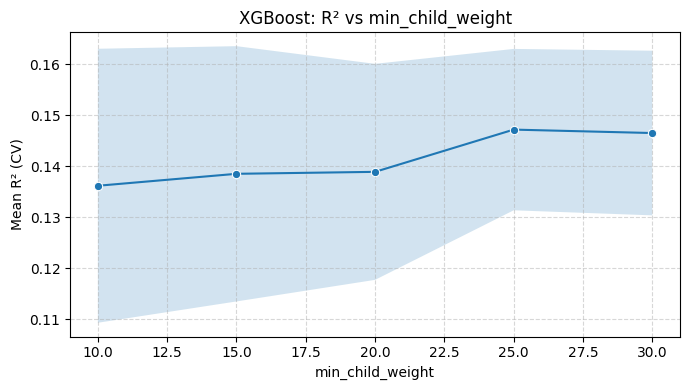

In [128]:
plt.figure(figsize=(7,4))
sb.lineplot(data=cv_df, x="min_child_weight", y="Mean R²", marker="o")
plt.fill_between(cv_df["min_child_weight"], cv_df["Mean R²"]-cv_df["Std R²"],
                 cv_df["Mean R²"]+cv_df["Std R²"], alpha=0.2)
plt.title("XGBoost: R² vs min_child_weight")
plt.xlabel("min_child_weight")
plt.ylabel("Mean R² (CV)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [129]:
best_xgb = grid.best_estimator_
print("\nBest min_child_weight:", grid.best_params_["min_child_weight"])
print("Best CV R²:", round(grid.best_score_, 3))

y_pred = best_xgb.predict(x_test)
mae  = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("\n=== Test Set Performance (best model) ===")
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.3f}")


Best min_child_weight: 25
Best CV R²: 0.147

=== Test Set Performance (best model) ===
MAE  : 3837.027
RMSE : 36018543.226
R²   : 0.187


* now we get 5 parameter that already fix:
    1. max depth = 6
    2. n_estimators = 15
    3. gamma = 0
    4. Learning_rate = 0.1
    5. min_child_weight = 25

The final XGBoost configuration — max_depth=6, n_estimators=15, gamma=0, learning_rate=0.1, and min_child_weight=25 — achieves a balanced model between accuracy and generalization.
This setup limits overfitting by using moderate depth and strong regularization while maintaining efficient learning speed.
Overall, it provides stable performance with optimized control over model complexity, making it suitable for predicting Customer Lifetime Value on this dataset.

# XGBoost save in Pickle

In [130]:
xgb = XGBRegressor(
    max_depth=3,
    n_estimators=15,
    gamma=0,
    learning_rate=0.1,
    min_child_weight=25
)

In [137]:
xgb.fit(x_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [142]:
import pickle
modeling_dataset_sav = "model.sav"


In [139]:
pickle.dump(
    xgb,
    open(file=f"{modeling_dataset_sav}",mode="wb")
)

In [141]:
model_load = pickle.load(
    open(file=f"{modeling_dataset_sav}",mode="rb")
)

model_load

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None
